# Task:3 Iris Flower Classification

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Data Gathering**

In [78]:
ifc = pd.read_csv("/content/IRIS.csv")

In [79]:
ifc.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
ifc.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Data Cleaning**

In [81]:
ifc['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [82]:
ifc.shape

(150, 5)

In [83]:
ifc.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [84]:
ifc

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Data Visualization and Analysis**

In [85]:
ifc.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


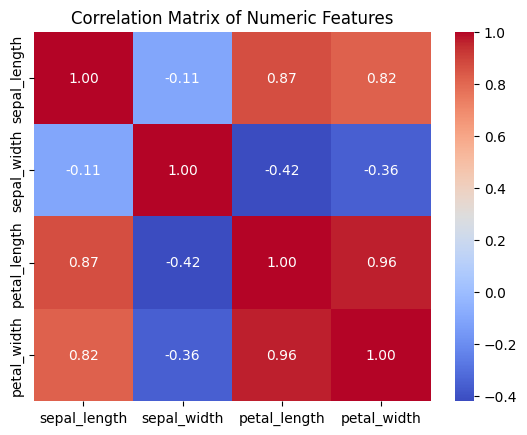

In [86]:
numeric_ifc = ifc.select_dtypes(include=['number'])
correlation_matrix = numeric_ifc.corr()
# plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

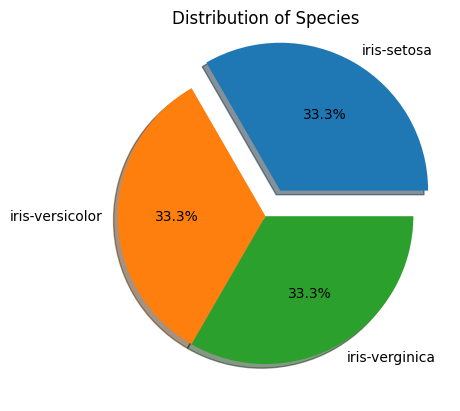

In [87]:
y = (ifc['species'])
plt.pie(y.value_counts(), labels=['iris-setosa','iris-versicolor','iris-verginica'], shadow=True, explode=[0.2,0,0] , autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.show()

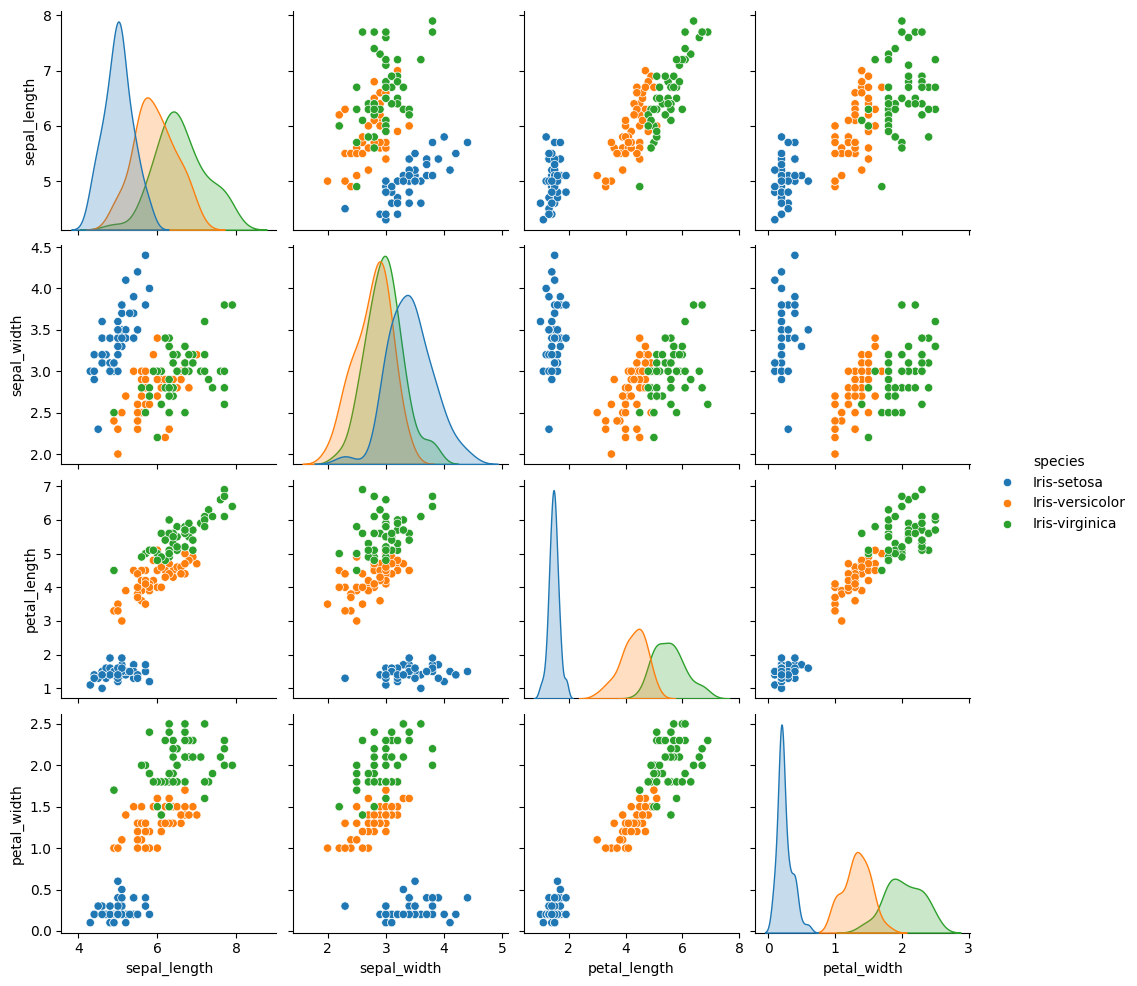

In [88]:
sns.pairplot(ifc, hue='species')
plt.show()

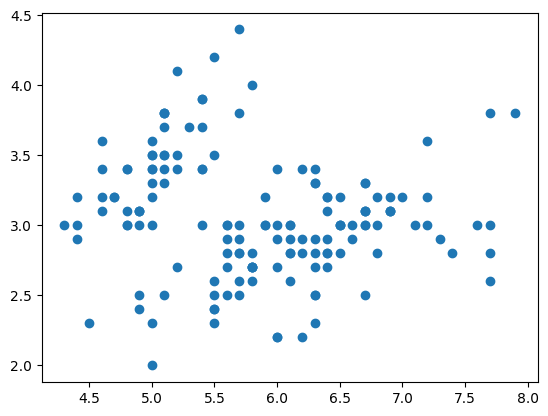

In [89]:
plt.scatter(x=ifc['sepal_length'], y=ifc['sepal_width'])
plt.show()

**Training and testing module**

**Logistic Regression**

In [90]:
X = ifc.drop('species', axis=1)
Y = ifc['species']

In [91]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Model Training**

**Logistic Regression**

***Train***

In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [95]:
X_train_pred = lr.predict(X_train)

In [96]:
from sklearn.metrics import accuracy_score

training_data_accuracy = accuracy_score(Y_train, X_train_pred)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9619047619047619


***Test***

In [97]:
lr.fit(X_test, Y_test)

LogisticRegression()

In [98]:
X_test_pred = lr.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score

testing_data_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  1.0


**Decision Tree Classifier**

***Train***



In [100]:
dt = DecisionTreeClassifier()

In [101]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [102]:
X_train_pred_dt = dt.predict(X_train)

In [103]:
from sklearn.metrics import accuracy_score

training_data_accuracy_dt = accuracy_score(Y_train, X_train_pred_dt)
print('Accuracy on training data : ', training_data_accuracy_dt)

Accuracy on training data :  1.0


***Test***

In [104]:
dt.fit(X_test, Y_test)

DecisionTreeClassifier()

In [105]:
X_test_pred_dt = dt.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score

testing_data_accuracy_dt = accuracy_score(Y_test, X_test_pred_dt)
print('Accuracy on testing data : ', testing_data_accuracy_dt)

Accuracy on testing data :  1.0


**Random Forest Classifier**

***Train***

In [107]:
rf = RandomForestClassifier()

In [108]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [109]:
X_train_pred_rf = rf.predict(X_train)

In [110]:
from sklearn.metrics import accuracy_score

training_data_accuracy_rf = accuracy_score(Y_train, X_train_pred_rf)
print('Accuracy on training data : ', training_data_accuracy_rf)

Accuracy on training data :  1.0


***Test***

In [111]:
rf.fit(X_test, Y_test)

RandomForestClassifier()

In [112]:
X_test_pred_rf = rf.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score

testing_data_accuracy_rf = accuracy_score(Y_test, X_test_pred_rf)
print('Accuracy on testing data : ', testing_data_accuracy_rf)

Accuracy on testing data :  1.0


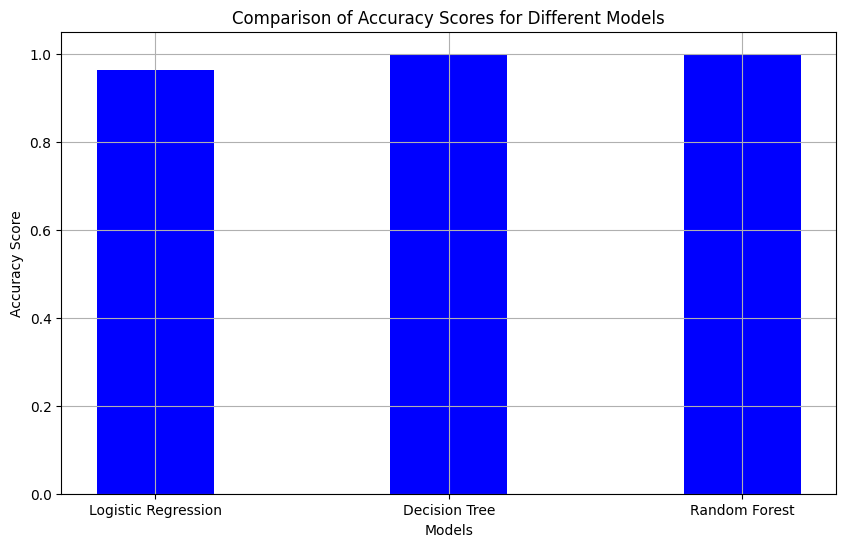

In [114]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [training_data_accuracy, training_data_accuracy_dt, training_data_accuracy_rf]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='blue', width=0.4)
plt.grid(True)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Accuracy Scores for Different Models")
plt.show()


In [115]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):

  input_data = [[sepal_length, sepal_width, petal_length, petal_width]]

  input_data_as_numpy_array = np.asarray(input_data)

  prediction = rf.predict(input_data_as_numpy_array)

  return prediction[0]

# Example usage
predicted_species = predict_species(3.5, 4.2, 1.0, 0.6)
print("Predicted species:", predicted_species)


Predicted species: Iris-setosa
